

<h1>LangGraph Basics – A Beginner-Friendly Guide</h1>

<p>LangGraph is a powerful framework built on top of LangChain to design large language model (LLM) workflows as directed graphs. This guide introduces key concepts with simple analogies to help beginners understand them quickly.</p>

<h2>1. State</h2>
<p><strong>What it is:</strong> The memory or data that flows through the graph.</p>
<p><strong>Analogy:</strong> Think of it like a backpack a student carries from class to class. It contains everything the student needs (books, notes, etc.), and it gets updated with new information as they learn.</p>

<h2>2. StateGraph</h2>
<p><strong>What it is:</strong> The overall structure or layout of your LangGraph workflow — like a blueprint.</p>
<p><strong>Analogy:</strong> Imagine a train network map. It shows all stations (nodes) and connections (edges), defining how you can travel (i.e., how data moves) from start to finish.</p>

<h2>3. Node</h2>
<p><strong>What it is:</strong> A task or step in your workflow that performs a specific action (e.g., LLM call, prompt, computation).</p>
<p><strong>Analogy:</strong> Like a classroom where the student (state) learns something new or completes an assignment.</p>

<h2>4. Edge</h2>
<p><strong>What it is:</strong> A connection between two nodes that defines the direction and order of execution.</p>
<p><strong>Analogy:</strong> Like a hallway connecting classrooms, guiding the student from one activity to the next.</p>

<h2>5. Tool</h2>
<p><strong>What it is:</strong> A function or API that the LLM can call to do something useful (e.g., search the web, do math).</p>
<p><strong>Analogy:</strong> A calculator or a phone in the student's backpack — not used every time, but handy when needed.</p>

<h2>6. ToolNode</h2>
<p><strong>What it is:</strong> A special kind of node that runs a tool — allows the model to interact with the outside world.</p>
<p><strong>Analogy:</strong> A help desk where the student can stop by to get external assistance (e.g., ask for directions or help with homework).</p>

<h2>7. Start</h2>
<p><strong>What it is:</strong> The first node or state where the execution begins.</p>
<p><strong>Analogy:</strong> The entrance to the school — where the student begins their day.</p>

<h2>8. End</h2>
<p><strong>What it is:</strong> A terminal node where the execution stops and the final output is returned.</p>
<p><strong>Analogy:</strong> The school bus stop at the end of the day — the student finishes all their tasks and returns home.</p>

<h2>9. Conditional Edge</h2>
<p><strong>What it is:</strong> A smart edge that decides where to go next based on the state’s value or output.</p>
<p><strong>Analogy:</strong> A fork in the hallway with a sign: “If you have Math class, go left; if you have English, go right.” It dynamically routes the student based on their schedule (i.e., logic in the graph).</p>

<h2>Conclusion</h2>
<p>LangGraph provides a powerful and modular way to build complex LLM workflows. By visualizing it as a system of students, classrooms, and hallways — you can quickly grasp how data and tasks move within a graph.</p>




###---------------------------------------------------------------------------------------------------------------------------------------------
# Step By Step Creation Of A Langgraph.

### 1) Create a State schema

In [2]:
from typing import TypedDict

# Create a State -> you can acess current state values as state["message"] where state is the obj
class AgentState(TypedDict):
    message:int

### 2) Create a Node
 - A node(function) takes a state as a input and returns state as a output always

In [3]:
def greet(state:AgentState) -> AgentState:
    state["message"] = "Hello " + state["message"] + " How is your day going?..." 
    return state

### 3) Create stategraph

In [4]:
from langgraph.graph import StateGraph

# Create a StateGraph object which takes schema of the state
graph_builder = StateGraph(state_schema=AgentState)

### 4) Add a node to the graph

In [5]:
graph_builder.add_node("greeter", greet)

### 5) Add Edge and add start and end nodes as well

In [6]:
from langgraph.graph import START, END
graph_builder.add_edge(START, "greeter")
graph_builder.add_edge("greeter", END)

### 6) Compile the graph

In [7]:
graph=graph_builder.compile()

### 7) Print results

In [9]:
results = graph.invoke({"message": "Rakesh"})
results["message"]

'Hello Rakesh How is your day going?...'

In [12]:
print(graph.get_graph().draw_ascii())


+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | greeter |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


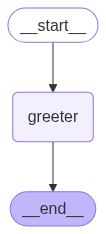

In [14]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass